# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [2]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb






In [3]:
# Read in the data using pandas
df = pd.read_csv('/Users/alexanderbriody/Desktop/Coding Temple/Data-Analytics-Projects/Week of July 30 2023/Day_3/OnlineNewsPopularity.csv')
pd.set_option('display.max_columns', None)

# View the dataset
df.head(10)
df = df.drop("url", axis=1)
df.head(10)



,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.0,-0.242778,-0.500,-

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [5]:
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

The 'shares' column label has a space that needs to be removed for coding to work.

In [6]:
df.rename(columns={' shares': 'shares'}, inplace=True)

Every column has values, and they are appropriate for their categories.


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64
Minimum shares: 1
Maximum shares: 843300


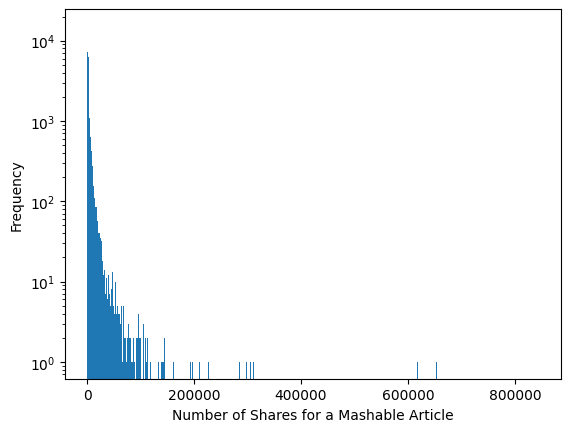

In [7]:


plt.hist(df['shares'], bins = 1000, log = True)
plt.xlabel('Number of Shares for a Mashable Article')
plt.ylabel('Frequency')

print(df['shares'].describe())
min_shares = df['shares'].min()
max_shares = df['shares'].max()

print("Minimum shares:", min_shares)
print("Maximum shares:", max_shares)


The data is right skewed, with quite a number of outliers. The central tendency is off and affects the model's ability to make accurate predictions about the number of shares for a Mashable article. We will have greater capability to make predictions for approximately 100,000 shares or less, but not above that amount.

/Users/alexanderbriody/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


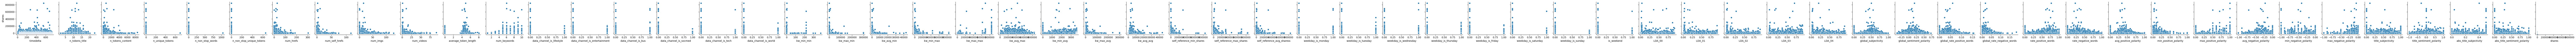

In [8]:
# Now, let's visualize the relationship between our target and the rest of our features
sns.pairplot(df, y_vars=['shares'])

The scatter plots give an introduction to the relationship between number of shares and the other attributes, such as 
the number of words in the content or number of images or type of data channel (e.g. Entertainment, Business, Lifestyle, etc.), and other attributes. At first glance, nothing seems to have a tell me what is a good predictor of number of shares, though number of words in the content ('n_tokens_content') appears to have a one-to-one negative relationship with number of shares.

In [9]:
# Step 1: Identify the target vector
target = 'shares'

# Step 2: Separate the target vector from the feature matrix
# Create the 2-D Feature Matrix:
X = df.drop(columns=target)

#Create the 1-D Target Vector:
y = df[target]

display(X)
print(y)

# Randomly select 1000 rows from the DataFrame because the dataset is much too large
sampled_df = df.sample(n=1000, random_state=42)
X_sampled = sampled_df.drop(columns=target)
y_sampled = sampled_df[target]

# Step 3: Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(X_sampled,y_sampled, train_size=.8, random_state=42)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work:
assert len(x_train) + len(x_test) == len(X_sampled), 'You did not separate the data properly'

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
17767,386.0,10.0,319.0,0.601974,1.0,0.813559,6.0,2.0,1.0,0.0,4.557994,9.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,439.0,154.222222,324.0,843300.0,247213.777778,324.000000,3474.158839,1840.620556,928.0,1500.0,1214.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.022366,0.022223,0.800112,0.022223,0.133076,0.426250,0.135417,0.028213,0.012539,0.692308,0.307692,0.477778,0.200000,0.6,-0.272917,-0.500000,-0.125000,0.000000,0.000000,0.500000,0.000000
16987,400.0,11.0,448.0,0.531746,1.0,0.540000,35.0,5.0,25.0,1.0,4.649554,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,846.0,201.200000,0.0,843300.0,564900.000000,0.000000,6702.457355,4244.008132,1700.0,6200.0,3766.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.198295,0.033354,0.033335,0.701682,0.033335,0.766908,-0.325060,0.017857,0.035714,0.333333,0.666667,0.475000,0.166667,0.6,-0.598524,-1.000000,-0.083333,0.000000,0.000000,0.500000,0.000000
30752,148.0,10.0,144.0,0.633803,1.0,0.828947,2.0,1.0,0.0,2.0,4.180556,8.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,4400.0,653.375000,4400.0,843300.0,396225.000000,1675.823529,5867.334963,3923.906530,2000.0,2000.0,2000.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025027,0.683199,0.025001,0.241766,0.025008,0.502962,0.070347,0.041667,0.048611,0.461538,0.538462,0.397619,0.200000,0.6,-0.260402,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000
36592,58.0,12.0,544.0,0.511070,1.0,0.714744,10.0,4.0,1.0,3.0,4.455882,6.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,201.0,70.250000,0.0,843300.0,365133.333333,0.000000,3595.395451,2189.825534,1300.0,2400.0,1850.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033495,0.033349,0.033419,0.152465,0.747271,0.412667,0.115208,0.038603,0.025735,0.600000,0.400000,0.372222,0.050000,1.0,-0.244048,-0.700000,-0.050000,1.000000,1.000000,0.500000,1.000000
9898,543.0,11.0,608.0,0.546218,1.0,0.696570,11.0,3.0,1.0,3.0,4.828947,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1200.0,326.428571,1600.0,843300.0,265800.000000,1400.000000,3519.815574,2655.311268,1400.0,1400.0,1400.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.171491,0.029643,0.171293,0.598976,0.028597,0.486516,0.129871,0.034539,0.013158,0.724138,0.275862,0.429850,0.033333,1.0,-0.401562,-0.800000,-0.125000,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,538.0,13.0,1674.0,0.372850,1.0,0.535240,8.0,3.0,16.0,0.0,4.359618,8.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,815.0,328.571429,0.0,843300.0,161637.500000,0.000000,3306.337898,2324.079184,1100.0,7700.0,4733.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025005,0.158551,0.025003,0.025003,0.766438,0.533292,0.068419,0.040621,0.047192,0.462585,0.537415,0.421271,0.100000,1.0,-0.185847,-0.800000,-0.033333,0.675000,0.333333,0.175000,0.333333
25604,232.0,14.0,366.0,0.552408,1.0,0.683983,14.0,1.0,3.0,0.0,4.931694,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,875.0,278.833333,1500.0,843300.0,276416

17767      791
16987     2000
30752     1200
36592     2800
9898     15000
         ...  
10182     2100
25604     5200
36301     2400
27883      843
5001      3900
Name: shares, Length: 200, dtype: int64


In [10]:
# Establish a baseline:
baseline = [sampled_df.shares.mean()] * len(sampled_df)
baseline

[3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,
 3085.654,

We want our predictive models to perform better than the baseline (vector).

In [11]:
round(sampled_df.shares.mean(), 2)

3085.65

So, 3,395.38 shares is our prediction for every data point.

We now create a linear regression model:

In [12]:
# Step 1a: Create the pipeline object
model_lr = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True), # Using category names for values

    # Step 1c: Add in the model object to the pipeline
    LinearRegression()
)

# Step 2: Fit the pipeline
model_lr.fit(x_train, y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('linearregression', LinearRegression())])

We now create a Decision Tree Regressor model:

In [13]:
# Step 1a: Create the pipeline object
pipe_dt = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    DecisionTreeRegressor(random_state=42)
)

# Step 2: Fit the pipeline
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

We now create a Random Forest Regressor model:

In [14]:
# Step 1a: Create the pipeline object
model_rf = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    RandomForestRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_rf.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

We now create a XGB Regressor model:

In [15]:
# Step 1a: Create the pipeline object
model_xgb = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    XGBRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_xgb.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [16]:
print('Mean Absolute Error Scores:')
print('------------------------------')
print('Baseline Model:')
print(round(mean_absolute_error(y_sampled, baseline),2))
print('------------------------------')
print('Linear Model:')
print(f'Training Error: {round (mean_absolute_error(y_train, model_lr.predict(x_train)),2)}')
print(f'Testing Error: {round (mean_absolute_error(y_test, model_lr.predict(x_test)),2)}')
print('------------------------------')
print('Decision Tree Model:')
print(f'Training Error: {round (mean_absolute_error(y_train, pipe_dt.predict(x_train)),2)}')
print(f'Testing Error: {round (mean_absolute_error(y_test, pipe_dt.predict(x_test)),2)}')
print('---------------------------------------')
print('Random Forest Model:')
print(f'Training Error: {round (mean_absolute_error(y_train, model_rf.predict(x_train)),2)}')
print(f'Testing Error: {round (mean_absolute_error(y_test, model_rf.predict(x_test)),2)}')
print('---------------------------------------')
print('XGBoosted Model:')
print(f'Training Error: {round (mean_absolute_error(y_train, model_xgb.predict(x_train)),2)}')
print(f'Testing Error: {round (mean_absolute_error(y_test, model_xgb.predict(x_test)),2)}')


Mean Absolute Error Scores:
------------------------------
Baseline Model:
2693.23
------------------------------
Linear Model:
Training Error: 2646.93
Testing Error: 2997.65
------------------------------
Decision Tree Model:
Training Error: 0.0
Testing Error: 3241.96
---------------------------------------
Random Forest Model:
Training Error: 1088.97
Testing Error: 2670.51
---------------------------------------
XGBoosted Model:
Training Error: 23.96
Testing Error: 2529.4


As said earlier, the baseline model predicts the average number of shares for all data points or all Mashable articles. As for the the MAE, the lower the number, the better performance of the predictive model, as it indicates the smaller difference between the predicted and actual number of shares.

The linear model has too many errors to begin with in training.

The decision tree model made the same huge leap in errors from training to testing, so this too is not a good model to generalize to unseen data.

The random forest model made a leap of about 1600 errors from training to testing, which is better than the other models in generalizing, but not great - it's not performing well on never before seen data.

The XG boosted model has a relatively small training error and the lowest testing error, so it seems to be the best performing.



In [17]:
print('R2 Accuracy Scores:')
print('------------------------------')
print('Baseline Model:')
print(round(r2_score(y_sampled, baseline),2))
print('------------------------------')
print('Linear Model:')
print(f'Training Error: {round (r2_score(y_train, model_lr.predict(x_train)),2)}')
print(f'Testing Error: {round (r2_score(y_test, model_lr.predict(x_test)),2)}')
print('------------------------------')
print('Decision Tree Model:')
print(f'Training Error: {round (r2_score(y_train, pipe_dt.predict(x_train)),2)}')
print(f'Testing Error: {round (r2_score(y_test, pipe_dt.predict(x_test)),2)}')
print('---------------------------------------')
print('Random Forest Model:')
print(f'Training Error: {round (r2_score(y_train, model_rf.predict(x_train)),2)}')
print(f'Testing Error: {round (r2_score(y_test, model_rf.predict(x_test)),2)}')
print('---------------------------------------')
print('XGBoosted Model:')
print(f'Training Error: {round (r2_score(y_train, model_xgb.predict(x_train)),2)}')
print(f'Testing Error: {round (r2_score(y_test, model_xgb.predict(x_test)),2)}')


R2 Accuracy Scores:
------------------------------
Baseline Model:
0.0
------------------------------
Linear Model:
Training Error: 0.14
Testing Error: -0.15
------------------------------
Decision Tree Model:
Training Error: 1.0
Testing Error: -0.52
---------------------------------------
Random Forest Model:
Training Error: 0.82
Testing Error: -0.02
---------------------------------------
XGBoosted Model:
Training Error: 1.0
Testing Error: 0.01


Overall, the XG boosted model seems to have the best performance as indicated by its perfect score of 1 in training. The testing error is 0.01 but it is still in between 0 and 1, unlike the other models' testing errors. A negative R-squared is worse than a value between 0 and 1, which is the range that is indicative of a predictable model.

So, now I will tune the XG boosted model further.

https://xgboost.readthedocs.io/en/latest/parameter.html

https://xgboost.ai/about

https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html

In [1]:
# Step 1: Create a parameter grid
param_grid = {
    'xgbregressor__eta': [0.1, 0.2, 0.3],
    'xgbregressor__gamma': [0.90, 0.95, 0],
    'xgbregressor__max_depth': [2, 4, 6],
}

# Step 2: Instantiate the RSCV module with the model object and the param_grid object
model = xgb.XGBRegressor()
clf = RandomizedSearchCV(model_xgb, param_grid)

# Step 3: Fit the data
clf.fit(x_train, y_train)


NameError: name 'xgb' is not defined

In [19]:
clf.best_score_


-0.25581588832323254

This score is related to the absolute value of the XGBoosted model testing error of 2529.4, indicating that this was the best the MAE thi model could achieve, which is still better than the other models.

In [20]:
clf.best_params_

{'xgbregressor__max_depth': 2,
 'xgbregressor__gamma': 0,
 'xgbregressor__eta': 0.1}

This indicates I got a max depth of 2. 0 for gamma, means no loss reduction in making further partitions on a tree leaf node. The eta of 0.1 indicates the step size shrinkage used to prevent overfitting - a smaller number such as 0.1 makes the learning slower but lead to better generalization.